# What Sells a Car?
Hundreds of free advertisements for vehicles are published from Crankshaft List every day. The purpose of this project is to determine which factors influence the price of a vehicle. The data collected over the last few years will be used.

We will be testing five hypotheses:
1. Mileage affects the price of a car. The more mileage a car has, the less it will be worth.  
2. Older cars will not be worth as much as newer cars
3.   Cars that are in better condition will be priced higher than cars in worse condition.
4. Transmission type will not have an effect on a car's price.
5. The car's paint color will not affect a car's price.



<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thank you for including project description in your work!
</div>

## Initialization

In [344]:
# Loading all libraries 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [345]:
# Loading the data 
try:
  df = pd.read_csv('vehicles_us.csv')
except:
  df = pd.read_csv('/datasets/vehicles_us.csv')

# Getting general description of our dataset
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


## Data Exploration

Description of the data:
* `price`
* `model_year`
* `model`
* `condition`
* `cylinders`
* `fuel` — gas, diesel, etc.
* `odometer` — the vehicle's mileage when the ad was published
* `transmission`
* `paint_color`
* `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
* `date_posted` — the date the ad was published
* `days_listed` — from publication to removal

In [346]:
# Obtaining the first 10 rows from df
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [347]:
# Seeing how many rows and columns our dataset has
df.shape

(51525, 13)

The dataset has 51,525 rows and 13 columns

In [348]:
# Obtaining general information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Since our dataset has 51,525 rows total, we can see that there are missing values in columns: `model_year`, `cylinder`, `odometer`, `paint_color`, `is_4wd`

In [349]:
# Percentage of missing values per column 
df_mis = df.isna().sum().to_frame('missing_values')
df_mis['%'] = round(100 * df.isna().sum() / len(df), 1)
print(df_mis.sort_values(by='%', ascending=False))

              missing_values     %
is_4wd                 25953  50.4
paint_color             9267  18.0
odometer                7892  15.3
cylinders               5260  10.2
model_year              3619   7.0
price                      0   0.0
model                      0   0.0
condition                  0   0.0
fuel                       0   0.0
transmission               0   0.0
type                       0   0.0
date_posted                0   0.0
days_listed                0   0.0


Our largest missing value comes from the `is_4wd` column. It has over 50% of missing data. The percentage of missing values from `paint_color`, `odometer`, `cylinders`, and `model_year` is significantly less. 

**Conclusions**

The dataset has 51,525 rows and 13 columns. Since column names follow rules of good style, no change will be needed there. There are five columns with missing values in them. Each of these columns vary in the amount of missing data.

Next we will preprocess the data to deal with missing values and duplicated data.

## Data Preprocessing

### Missing Values

In [350]:
# Calculating number of missing values per column
df.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
days_listed         0
date_posted         0
type                0
transmission        0
fuel                0
condition           0
model               0
price               0
dtype: int64

In [351]:
# Getting statistical summary of all numeric variables in the dataset
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


We can see that that the missing values in `odometer`, `cylinders`, and `model_year` are all quantitative values. 

The missing values in `paint_color` are categorical. The column `is_4wd` has Boolean values, so we categorize its missing values as categorical too since no calculations will be done on this column. 

We will deal with categorical missing values first. 

In [352]:
# Replacing missing values in paint_color with unknown 
df['paint_color'].fillna('unknown', inplace=True)

# Checking to see if missing values have been replaced
df['paint_color'].isna().sum()

0

In [353]:
# Getting unique values in is_4wd column
print(df['is_4wd'].unique())

[ 1. nan]


The `is_4wd` is a special kind of categorical variable called a logical (Boolean) variable, which means its value can be True (or 1) or False (or 0). Since the unique values in this column are either 1 or NaN, it is safe to assume that the missing values are not 4wd. We can then replace missing values  in this column with 0. 

In [354]:
# Replacing missing values in is_4wd with 0 
df['is_4wd'].fillna(value=0, inplace=True)

# Checking to see if missing values have been replaced
df['is_4wd'].isna().sum()

0

Now we will deal with quantitative missing values in `odometer`, `cylinders`, and `model_year` by deciding whether to replace each missing value with the mean of median of each column. 

In [355]:
# Getting statistical summary of odometer column 
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Since the mean and median are close in value, we can say that there are no significant outliers in the `odometer` column. We will use the mean to replace missing values in this column.

In [ ]:
# Calculating medians for each group
grouped_by_condition = df.groupby('condition').agg({'odometer': 'median'})

# Filling in null values for each group
for cond in df['condition'].unique():
    #so we use .loc to find corresponding value in our grouped dataframe
    df.loc[(df['condition'] == cond) & (df['odometer'].isna()), 'odometer'] = grouped_by_condition.loc[grouped_by_condition.index == cond, 'odometer'][0]

In [357]:
# Checking to see if missing values in the odometer column have been replaced
df['odometer'].isna().sum()

0

In [358]:
# Checking unique values in cylinders column
print(df['cylinders'].unique())



[ 6.  4.  8. nan  5. 10.  3. 12.]


A cylinder is a vital part of the engine. Generally, the more cylinders your engine has, the more power is produced. This means that each cylinder value is unique to each individual car.

We will check the percentage of missing values in the `cylinders` column to see if we can drop the missing values instead. 

In [359]:
# Calculating percentage of missing values in the cylinders column
mis_cylinders = df['cylinders'].isna().sum() / len(df)
print(f'Percent of missing values in the cylinders column: {mis_cylinders:.0%}')

Percent of missing values in the cylinders column: 10%


Since the missing values in the `cylinders` column is only ~10% of our data, we cannot drop the missing values here without it affecting our analysis. We will replace missing value in `cylinders` with the median. 

In [360]:
# Replacing missing values in the cylinders column with the median
cylinders_med = df['cylinders'].median()
df['cylinders'].fillna(cylinders_med, inplace=True)

In [361]:
# Checking to see if missing values in the cylinders column have been replaced
df['cylinders'].isna().sum()

0

In [362]:
# Checking for unique values in the model_year column 
print(df['model_year'].unique())

[2011.   nan 2013. 2003. 2017. 2014. 2015. 2012. 2008. 2018. 2009. 2010.
 2007. 2004. 2005. 2001. 2006. 1966. 1994. 2019. 2000. 2016. 1993. 1999.
 1997. 2002. 1981. 1995. 1996. 1975. 1998. 1985. 1977. 1987. 1974. 1990.
 1992. 1991. 1972. 1967. 1988. 1969. 1989. 1978. 1965. 1979. 1968. 1986.
 1980. 1964. 1963. 1984. 1982. 1973. 1970. 1955. 1971. 1976. 1983. 1954.
 1962. 1948. 1960. 1908. 1961. 1936. 1949. 1958. 1929.]


Since the model year is also a value that is unique to each car. We will check the percentage of missing values in this column to see if we can drop the missing values. 

In [363]:
# Calculating percentage of missing values in the model_year column 
mis_model_year = df['model_year'].isna().sum() / len(df)
print(f'Percentage of missing values in model_year: {mis_model_year:.0%}')

Percentage of missing values in model_year: 7%


We cannot drop the missing values in this column so we will replace it with the median.

In [364]:
# Replacing missing values in the model_year column with the mean
model_year_med = df['model_year'].median()
df['model_year'].fillna(model_year_med, inplace=True)

In [365]:
# Checking to see if missing values in the model_year column have been dropped
df['model_year'].isna().sum()

0

In [366]:
# Checking to see if all missing values have been dealt with
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

### Duplicates

In [367]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in this dataset.

### Fixing data types

In [368]:
# Getting information about the data types of each column 
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

To make the datset easier to work with, we will change `model_year`, `cylinders`, `odometer`, and `is_4wd` from the float (decimal) to the integer type. 

Since the values in the `date_posted` column are written as strings, we will convert the values to datetime format so that it is easier for Python to read. 

In [369]:
# Converting model_year, cylinders, odometer, and is_4wd to integers
df['model_year'] = df['model_year'].astype('int64')
df['cylinders'] = df['cylinders'].astype('int64')
df['odometer'] = df['odometer'].astype('int64')
df['is_4wd'] = df['is_4wd'].astype('int64')

In [370]:
# Converting values in date_posted to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y/%m/%d')

We will add additional factors to the data to make our analysis easier. 

### Enriching data

In [371]:
# Adding datetime values for when the ad was placed

# Adding column for year in which ad was placed
df['year_posted'] = pd.DatetimeIndex(df['date_posted']).year

# Adding column for month in which ad was placed
df['month_posted'] = pd.DatetimeIndex(df['date_posted']).month

# Adding column for day in which ad was placed
df['day_posted'] = pd.DatetimeIndex(df['date_posted']).day

In [372]:
# Adding column for vehicle's age when the ad was placed
df['car_age'] = df['year_posted'] - df['model_year']

We will also add a vehicle's average mileage per year. To do that, we take the vehicle’s total mileage and divide it by the age of the vehicle. Let's first check the unique values in `car_age` to make sure we don't have problematic values when dividing. 

In [373]:
# Getting unique values for the car_age column
print(df['car_age'].unique())

[  7   6  16   2   4   3  11   1  10   5   8   0  15  14   9  13  17  12
  53  24  18  19  26  22  38  20  23  44  21  25  33  42  31  43  29  28
  46  52  49  30  40  54  39  50  27  32  55  37  56  34  45  41  51  63
  47  48  36  35  65  57  71  58  59 110  82  69  60  89]


Dividing by 0 will cause infinite values. In order to avoid such this problem while leaving all rows, we will replace add 1 to all values in the the `car_age` column.

In [374]:
# Replacing 0 in the car_age column with 1
df['car_age'] = df['car_age'] + 1

In [375]:
# Checking unique values in the car_age column to make sure all the 0's have been replaced
print(df['car_age'].unique())

[  8   7  17   3   5   4  12   2  11   6   9   1  16  15  10  14  18  13
  54  25  19  20  27  23  39  21  24  45  22  26  34  43  32  44  30  29
  47  53  50  31  41  55  40  51  28  33  56  38  57  35  46  42  52  64
  48  49  37  36  66  58  72  59  60 111  83  70  61  90]


In [376]:
# Adding the vehicle's average mileage per year
df['avg_yearly_mileage'] = df['odometer'] / df['car_age']

In the `condition` column, we will replace string values with a numeric scale to make this column easier to manipulate:
* new = 5
* like new = 4
* excellent = 3
* good = 2
* fair = 1
* salvage = 0

In [377]:
# Changing string values to numeric values in the condition column 
df['condition'] = df['condition'].replace(['new', 'like new','excellent','good','fair','salvage'], [5,4,3,2,1,0])

In [378]:
# Getting general info of data after manipulations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
price                 51525 non-null int64
model_year            51525 non-null int64
model                 51525 non-null object
condition             51525 non-null int64
cylinders             51525 non-null int64
fuel                  51525 non-null object
odometer              51525 non-null int64
transmission          51525 non-null object
type                  51525 non-null object
paint_color           51525 non-null object
is_4wd                51525 non-null int64
date_posted           51525 non-null datetime64[ns]
days_listed           51525 non-null int64
year_posted           51525 non-null int64
month_posted          51525 non-null int64
day_posted            51525 non-null int64
car_age               51525 non-null int64
avg_yearly_mileage    51525 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(11), object(5)
memory usage: 7.1+ MB


In [379]:
# Obtaining the first 5 rows of our data after manipulations 
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,car_age,avg_yearly_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,23,8,18125.000000
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,19,8,11088.125000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,7,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9,2019,3,22,17,10683.117647
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,2,3,26967.666667


**Conclusions**

We replaced missing values from `paint_color` within "unknown." Since there were no significant outliers in the `odometer` column, we replaced missing values with the mean. Since the missing values in `is_4wd` are Boolean values, with 1 meaning True and 0 meaning False, we replaced all missing values with 0. Since the cylinder and model year of a car is specific to each individual car, we replaced the missing values in those columns with their median value. 


To make our dataset easier to work with, we changed the values from  `model_year`, `cylinders`, `odometer`, and `is_4wd` from float (decimal) to the integer type. We changed values in the `date_posted` column from object(string) type to datetime. In the `condition` column, we replaced string values with a numeric scale (0-5) to make this column easier to manipulate. 

We added five extra columns to the dataset: 
* `year_posted` - the year the car ad got posted
* `month_posted` - the month the car ad got posted
* `day_posted` - the day the car ad got posted
* `car_age`- the car's age (in years) when the ad was placed
* `avg_yearly_mileage`- the car's average mileage per year

We will now carry out exploratory data analysis and study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition.

## Exploratory Data Analysis (EDA)

### Histograms of core parameters:
* Price
* Vehicle's age when the ad was placed
* Mileage
* Number of cylinders
* Condition

Text(0.5, 1.0, "Histogram of Vehicle's Price")

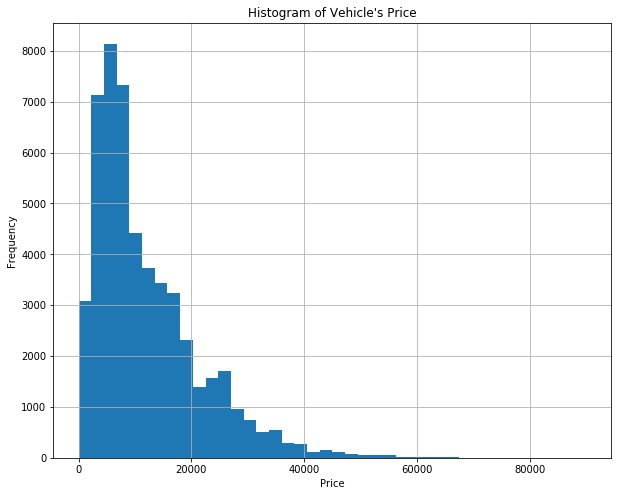

In [380]:
# Plotting a histogram of vehicle's price
df['price'].hist(range=(0,90000), bins=40, figsize=(10,8))


# Adding tile and axes label
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram of Vehicle's Price")



The histogram above shows the distribution of the vehicle's price. Most values are clustered to the left at between \$0 to \$18,000. The long tail extends to the right indicating the the distribution is **skewed right**. The peak of the distribution is around \$5000 - \$7000 mark. By looking at the histogram, we can conclude that there are significant outliers. 

Text(0.5, 0, "Vehicle's Age (years)")

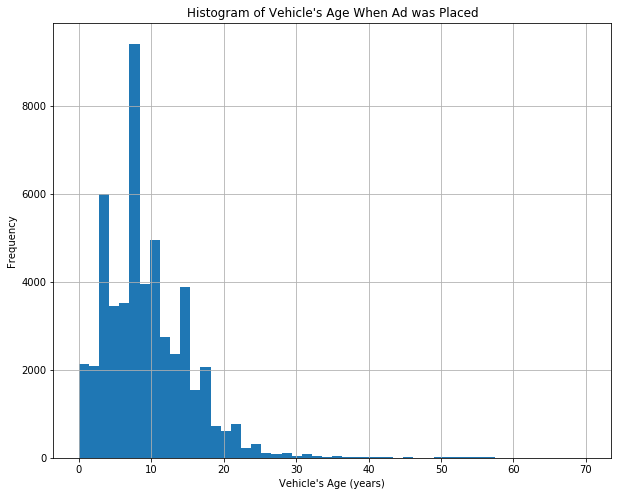

In [381]:
# Histogram of vehicle's age when the ad was placed
df.hist('car_age', bins=50, range=(0,70), figsize=(10,8))

# Adding title and axes label
plt.title("Histogram of Vehicle's Age When Ad was Placed")
plt.ylabel('Frequency')
plt.xlabel("Vehicle's Age (years)")

The histogram above shows the vehicle's age (in years) when the ad was placed.Most values are clustered to the left at around 0 to 10 years. The peak of the distribution is roughly at 3 years. The long tail extends to the right, indicating the the distribution is **skewed right**. By looking at the histrogram, we can conclude that there are significant outliers. 



Text(0, 0.5, 'Frequency')

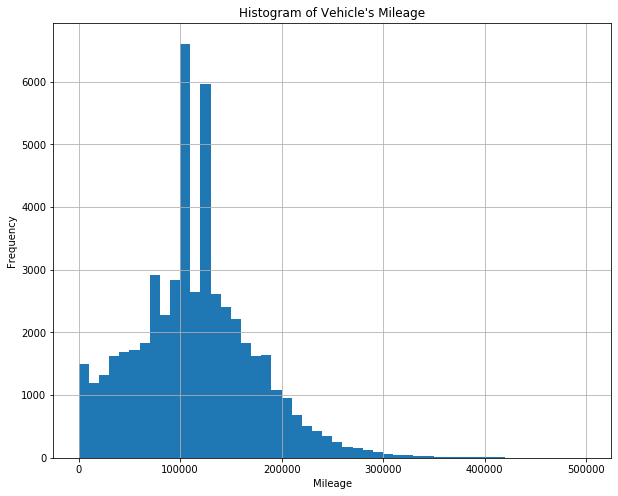

In [382]:
# Histogram of the vehicle's mileage
df.hist('odometer', bins=50, range=(0,500000), figsize=(10,8))

# Adding title and axes label
plt.title("Histogram of Vehicle's Mileage")
plt.xlabel('Mileage')
plt.ylabel('Frequency')

The histogram above shows the vehicle's mileage. Most values fall between 0 to 200,000. The peak of the distribution is roughly at 120,000. The long tail extends to the right, indicating the the distribution is **skewed right**. By looking at the histrogram, we can conclude that there are significant outliers.

Text(0, 0.5, 'Frequency')

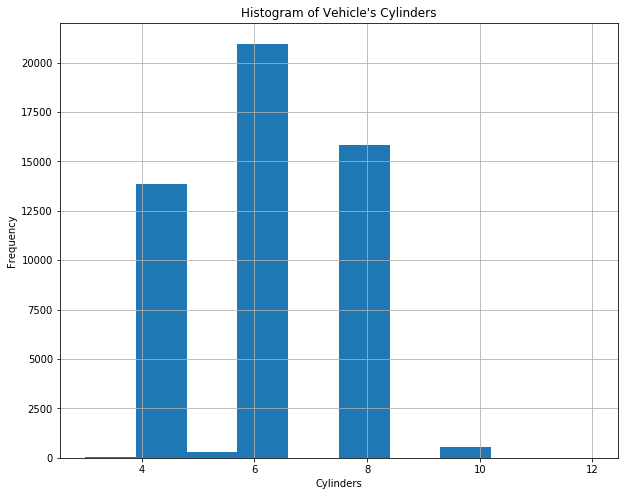

In [383]:
# Histogram of the vehicle's cylinders
df.hist('cylinders', bins=10, figsize=(10,8))

# Adding title and axes label
plt.title("Histogram of Vehicle's Cylinders")
plt.xlabel('Cylinders')
plt.ylabel('Frequency')

The histogram above shows the vehicle's cylinders. Most cars have 4-cylinders (V4), 6-cylinders (V6), or 8-cylinders (V8). The peak of the distribution is at 8-cylinders. By looking at the histrogram, we can conclude that there are significant outliers.

Text(0, 0.5, 'Frequency')

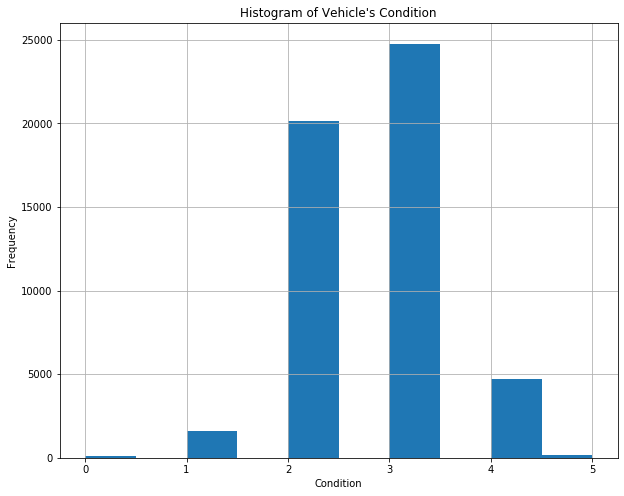

In [384]:
# Histogram of the vehicle's condition 
df.hist('condition', bins=10, figsize=(10,8))

# Adding title and axes label
plt.title("Histogram of Vehicle's Condition")
plt.xlabel('Condition')
plt.ylabel('Frequency')

The histogram above shows the vehicle's condition. Most cars have a condition value of 2 (good) and 3 (excellent). The peak of the distribution is at 3 (excellent condition). By looking at the histrogram, we can conclude that there are significant outliers.

### Outlier detection 

In [385]:
# Getting statistical summary of the core parameters
df[['price', 'car_age', 'odometer', 'cylinders', 'condition']].describe()

,price,car_age,odometer,cylinders,condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,9.469229,115199.007278,6.112450,2.637535
std,10040.803015,6.079773,60484.868232,1.573784,0.712447
min,1.000000,1.000000,0.000000,3.000000,0.000000
25%,5000.000000,5.000000,75668.000000,4.000000,2.000000
50%,9000.000000,8.000000,110908.000000,6.000000,3.000000
75%,16839.000000,13.000000,147821.000000,8.000000,3.000000
max,375000.000000,111.000000,990000.000000,12.000000,5.000000


From our initial visualization to detect outliers, we can see that the `price`, `car_age`, and `odometer` variables have significant outliers. Looking at the `price`, we see that the minimum price is 1 and the maximum price is 375,000. In `car_age`, the mean age is 9, while the maximum car age is 111 years with a standard deviation of 6. There is clearly an outlier in `car_age`. In the cases of `cylinders` and `condition`, the outliers are not as obvious, so we need to explore it further. 

We must remove these outliers before we proceed into analysis. 

Text(0.5, 1.0, "Boxplot of Vehicle's Price")

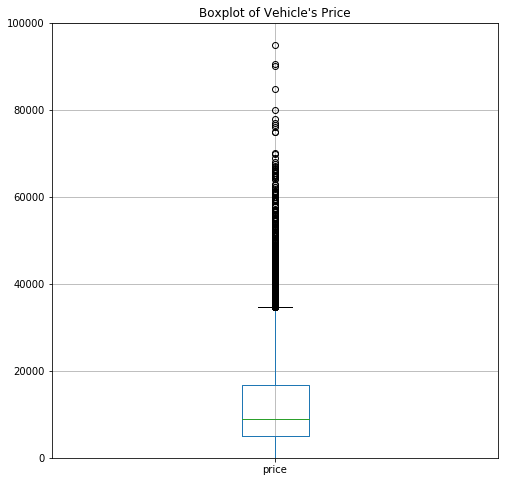

In [386]:
# Boxplot of vehicle's price
df.boxplot('price', figsize=(8,8))
plt.ylim(0,100000)

# Adding title 
plt.title("Boxplot of Vehicle's Price")

From the boxplot of of `price`, we can see that there are outliers in this variable. 

In [387]:
# Finding the first and third quartiles of price 
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Finding the IQR of price
IQR = Q3 - Q1

# Finding the upper and lower outlier limits of price
lower_outlier_price = Q1 - 1.5*IQR
print(f'Lower bound for price: {lower_outlier_price}')
upper_outlier_price = Q3 + 1.5*IQR
print(f'Upper bound for price: {upper_outlier_price}')

Lower bound for price: -12758.5
Upper bound for price: 34597.5


Text(0.5, 1.0, "Boxplot of Vehicle's Age When Ad was Placed")

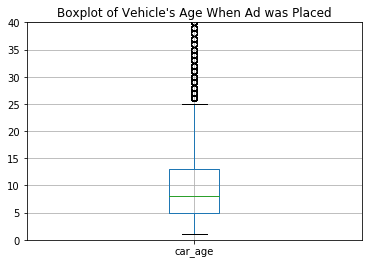

In [388]:
# Boxplot of vehicle's age when the ad was placed
df.boxplot('car_age')
plt.ylim(0,40)

# Adding title
plt.title("Boxplot of Vehicle's Age When Ad was Placed")

Form the boxplot of `car_age`, we can see that there are outliers in this variable. 

In [389]:
# Finding the first and third quartile of vehicle's age when ad was placed
Q1 = df['car_age'].quantile(0.25)
Q3 = df['car_age'].quantile(0.75)

# Finding the IQR of car_age
IQR = Q3 - Q1

# Finding the upper and lower outlier limits of car_age
lower_outlier_car_age =  Q1 - 1.5*IQR
print(f'Lower bound limit for vehicle\'s age: {lower_outlier_car_age}')
upper_outlier_car_age = Q3 + 1.5*IQR
print(f'Upper bound limit for vehicle\'s age: {upper_outlier_car_age}')

Lower bound limit for vehicle's age: -7.0
Upper bound limit for vehicle's age: 25.0


Text(0.5, 1.0, "Boxplot of Vehicle's Mileage")

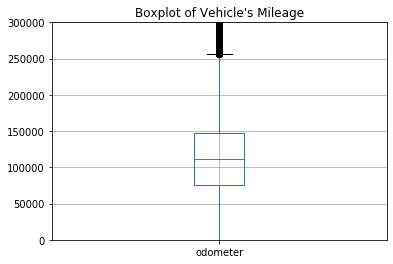

In [390]:
# Boxplot of car's mileage 
df.boxplot('odometer')
plt.ylim(0,300000)

# Adding title
plt.title("Boxplot of Vehicle's Mileage")

From the boxplot of `odometer`, we can see that there are outliers in this variable.

In [391]:
# Finding the first and third quartile of the vehicle's mileage
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)

# Finding the IQR of car_age
IQR = Q3 - Q1

# Finding the upper and lower outlier limits of odometer
lower_outlier_odometer =  Q1 - 1.5*IQR
print(f'Lower bound limit for odometer: {lower_outlier_odometer}')
upper_outlier_odometer = Q3 + 1.5*IQR
print(f'Upper bound limit for odometer: {upper_outlier_odometer}')

Lower bound limit for odometer: -32561.5
Upper bound limit for odometer: 256050.5


Text(0.5, 1.0, "Boxplot of Vehicle's Cylinders")

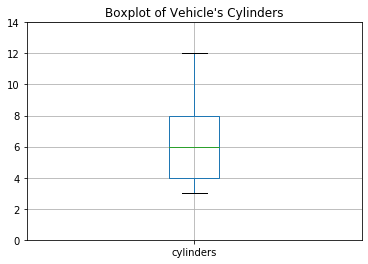

In [392]:
# Boxplot of the vehicle's cylinders
df.boxplot('cylinders')
plt.ylim(0,14)

# Adding title
plt.title("Boxplot of Vehicle's Cylinders")

From the boxplot of `cylinders`, we can see that there are no outliers in this variable. To be sure, we will find the value counts of `cylinders`.

In [393]:
# Finding value_counts() of the cylinders column
print(df['cylinders'].value_counts())

6     20960
8     15844
4     13864
10      549
5       272
3        34
12        2
Name: cylinders, dtype: int64


There are very few cars that have 3-cylinders (V3) and 12-cylindres (V12), so we can remove these values. 

In [394]:
# Finding the first and third quartile of the vehicle's cylinders
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)

# Finding the IQR of car_age
IQR = Q3 - Q1

# Finding the upper and lower outlier limits of odometer
lower_outlier_cylinders =  Q1 - 1.5*IQR
print(f'Lower bound limit for cylinders: {lower_outlier_cylinders}')
upper_outlier_cylinders = Q3 + 1.5*IQR
print(f'Upper bound limit for cylinders: {upper_outlier_cylinders}')

Lower bound limit for cylinders: -2.0
Upper bound limit for cylinders: 14.0


Text(0.5, 1.0, "Boxplot of Vehicle's Condition")

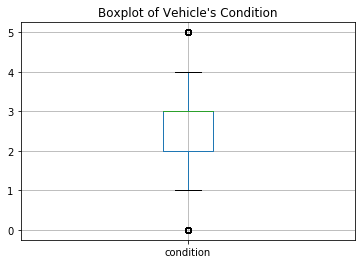

In [395]:
# Boxplot of the vehicle's condition
df.boxplot('condition')

# Adding title
plt.title("Boxplot of Vehicle's Condition")

From the boxplot of `condition`, we can see that there are outliers in this variable.

In [396]:
# Finding the first and third quartile of the vehicle's condition
Q1 = df['condition'].quantile(0.25)
Q3 = df['condition'].quantile(0.75)

# Finding the IQR of car_age
IQR = Q3 - Q1

# Finding the upper and lower outlier limits of odometer
lower_outlier_condition =  Q1 - 1.5*IQR
print(f'Lower bound limit for condition: {lower_outlier_condition}')
upper_outlier_condition = Q3 + 1.5*IQR
print(f'Upper bound limit for condition: {upper_outlier_condition}')

Lower bound limit for condition: 0.5
Upper bound limit for condition: 4.5


In [397]:
# Creating a new DataFrame 
df_filtered = df.copy()

# Removing outliers from our original dataframe and storing it into df_filtered
df_filtered = df_filtered[(df_filtered.price >= lower_outlier_price) & (df_filtered.price <= upper_outlier_price)]
df_filtered = df_filtered[(df_filtered.car_age >= lower_outlier_car_age) & (df_filtered.car_age <= upper_outlier_car_age)]
df_filtered = df_filtered[(df_filtered.odometer >= lower_outlier_odometer) & (df_filtered.odometer <= upper_outlier_odometer)]
df_filtered = df_filtered[(df_filtered.cylinders > 3) & (df_filtered.cylinders < 12)]
df_filtered = df_filtered[(df_filtered.condition >= lower_outlier_condition)]

In [398]:
# Getting a statistical summary of our parameters without outliers
df_filtered[['price', 'car_age', 'odometer', 'cylinders', 'condition']].describe()

,price,car_age,odometer,cylinders,condition
count,48151.000000,48151.000000,48151.000000,48151.000000,48151.000000
mean,11252.872381,9.174929,113680.763951,6.054288,2.641835
std,7828.267871,4.998192,53085.291409,1.571224,0.688235
min,1.000000,1.000000,0.000000,4.000000,1.000000
25%,5000.000000,5.000000,78716.000000,4.000000,2.000000
50%,8995.000000,8.000000,111904.000000,6.000000,3.000000
75%,15991.000000,12.000000,146000.000000,8.000000,3.000000
max,34595.000000,25.000000,256000.000000,10.000000,5.000000


By looking at the statistics of our new filtered data, we can see that the outliers in the original dataset have been removed. The max value of `price` changed from 375,000 to 32,400. The max value of `car_age` changed from 110 to 24. The max value of `odometer` changed from 990,000 to 245,000. We removed 3-cylinder and 12-cylinder cars from the `cylinders` column. The median of the filtered data has also become closer in value to the mean. 

### Histogram of core paramaters without outliers

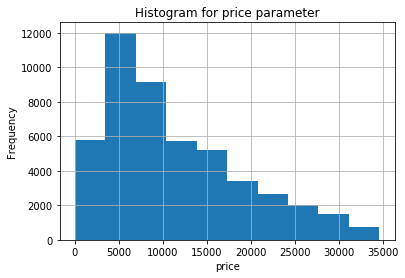

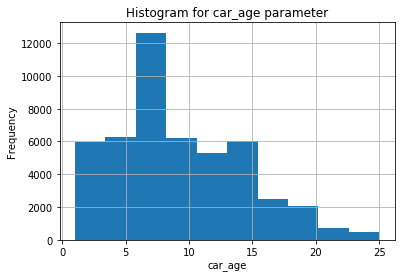

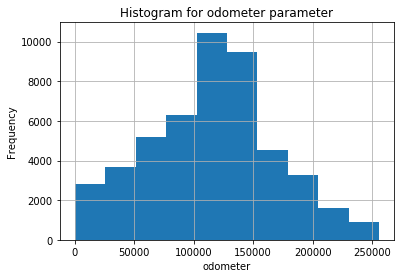

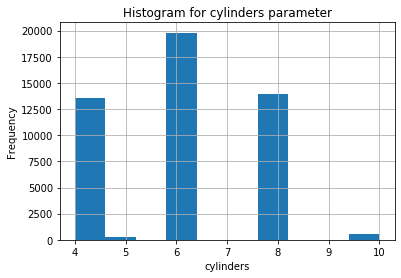

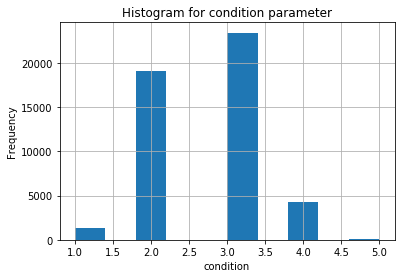

In [399]:
# Creating a histogram for core parameters (price, car_age, odometer, cylinders, condition)
for i in ['price','car_age', 'odometer', 'cylinders', 'condition']:
    df_filtered[i].hist()

# Adding title and axes label
    plt.title('Histogram for {} parameter'.format(i))
    plt.xlabel('{}'.format(i))
    plt.ylabel('Frequency')

# Plotting each histogram per core parameter
    plt.show()

Conclusion from each histogram:
* Histogram for `price`: Most cars cost between \$4000-\$6000. 
* Histogram for `car_age`: Most cars posted are between 7-10 years old
* Histogram for `odometer`: On average most cars have a mileage of 99,000-120,000
* Histogram for `cylinders`: The most common cylinders are 4-cylinders(V4), 6-cylinders(V6), and 8-cylinder(V8). Most cars posted have a V6.
* Histogram for `condition`: Most cars falls between good to excellent condition



### Analyzing typical lifetime of an ad

Text(0, 0.5, 'Frequency')

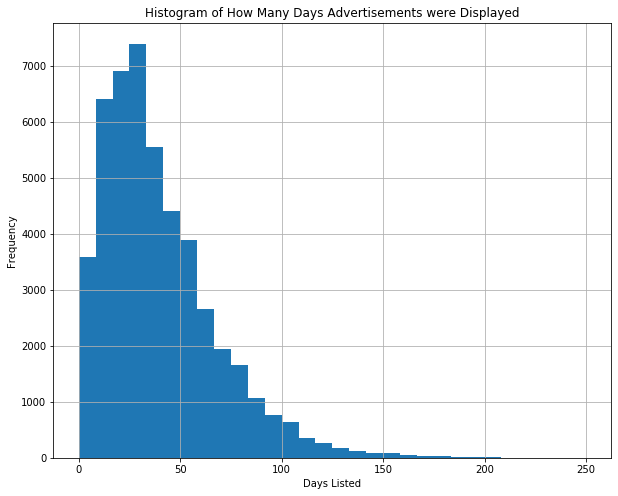

In [400]:
# Histogram of how many days advertisements were displayed (days_listed)
df_filtered.hist('days_listed', bins=30, range=(0,250), figsize=(10,8))

# Adding title and axes label
plt.title('Histogram of How Many Days Advertisements were Displayed')
plt.xlabel('Days Listed')
plt.ylabel('Frequency')

The histogram above shows how many days advertisements were displayed. Most values are clustered to the left at around 10 to 50 days. The peak of the distribution is roughly at 30 years. The long tail extends to the right, indicating the the distribution is **skewed right**.

In [401]:
# Getting statistical summary of days_listed
df_filtered['days_listed'].describe()


count    48151.000000
mean        39.536624
std         28.215810
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The average lifetime of an ad is about 40 days and the median is 33 days. In general, most cars were posted for a little over a month before it sold. There were also ads that were listed for 0 days. This could either mean that the car sold within the same day it was listed or that the post was removed the same day it was listed. There were also ads that have been on there for 271 days, which is almost a year. 

In [402]:
# Ads with the shortest listing time
shortest_listing_time = df_filtered.query('days_listed <= 1')
print(f'Number of ads with shortest listing times: {len(shortest_listing_time)}')

Number of ads with shortest listing times: 215


There were 213 ads placed that had a listing time of less than a day to 1 day, meaning people 213 people were either able to sell there cars in about 24 hours or they removed their listing within a day of posting.

In [403]:
# Ads with the longest listing time
longest_listing_time = df_filtered.query('days_listed >= 100')
print(f'Number of ads with longest listing times: {len(longest_listing_time)}')

Number of ads with longest listing times: 1893


There were 1,884 ads that have been posted for at least 100 days, meaning that the 1,844 cars have been listed on there for at least 3 months. 

### Analyzing the number of ads and the average price for each type of vehicle

To avoid bias when carrying out analysis, we will aggregate data for type of vehicles that have been listed for at least 3 days but no greater than 100 days. 

In [404]:
# Creating pivot table for number of ads for each type of vehicle
type_ad = df_filtered.query('3 <= days_listed <= 100').pivot_table(index='type', values='days_listed', aggfunc=['count', 'mean'])

# Renaming column
type_ad.columns = ['car_type_count', 'avg_days_listed']

# Printing pivot table
type_ad


,car_type_count,avg_days_listed
type,,
SUV,11292,36.643287
bus,23,43.086957
convertible,338,36.011834
coupe,1922,35.726327
hatchback,951,37.864353
mini-van,1075,36.046512
offroad,170,35.705882
other,231,35.770563
pickup,5988,36.726286


In [405]:
# Creating pivot table for average price per each type of vehicle
type_price = df_filtered.pivot_table(index='type', values='price', aggfunc='mean')

# Renaming column
type_price.columns = ['avg_price']

# Printing pivot table
type_price

,avg_price
type,
SUV,10473.114811
bus,17445.913043
convertible,12850.807365
coupe,13512.806133
hatchback,6855.496496
mini-van,8078.897278
offroad,14292.989071
other,10482.776371
pickup,15090.003518


In [406]:
# Creating table for number of ads and the average price for each type of vehicle
car_type_avg = type_ad.join(type_price, on='type').sort_values(by='car_type_count', ascending=False)

# Printing table
car_type_avg

,car_type_count,avg_days_listed,avg_price
type,,,
sedan,11383,36.414214,6989.851272
SUV,11292,36.643287,10473.114811
truck,10571,36.688582,15165.515601
pickup,5988,36.726286,15090.003518
coupe,1922,35.726327,13512.806133
wagon,1405,36.870463,9015.849599
mini-van,1075,36.046512,8078.897278
hatchback,951,37.864353,6855.496496
van,536,36.335821,8889.480969


Text(0, 0.5, 'Number of ads')

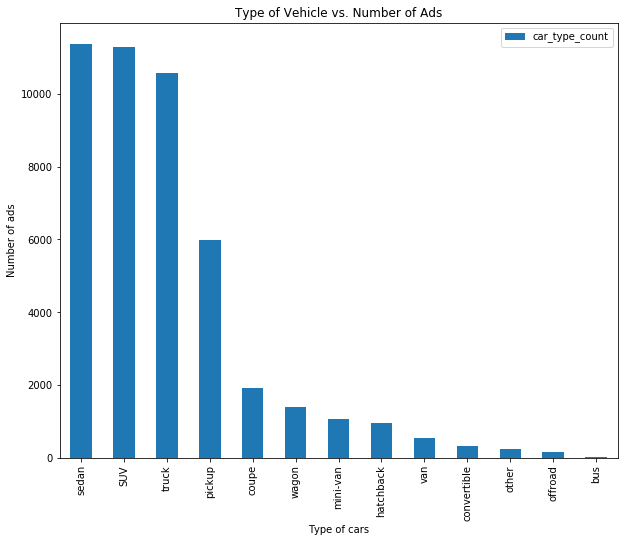

In [407]:
 # Plot a graph showing the dependence of the number of ads on the vehicle type
car_type_avg.reset_index().plot(kind='bar', x='type', y='car_type_count', figsize=(10,8))

# Adding title and axes label
plt.title('Type of Vehicle vs. Number of Ads')
plt.xlabel('Type of cars')
plt.ylabel('Number of ads')


The types of cars with the greatest number of ads are sedans and SUVs. The average price of a sedan is 7,004 and the average price of a SUV is 10,500 dollars. On average both of these cars are listed for a little over a month before selling. 

### Price factors

In [408]:
# Creating a new variable for popular car types
popular_cars = df_filtered.query('3 <= days_listed <= 100')

Text(0.5, 1, 'Correlation Matrix Plot')

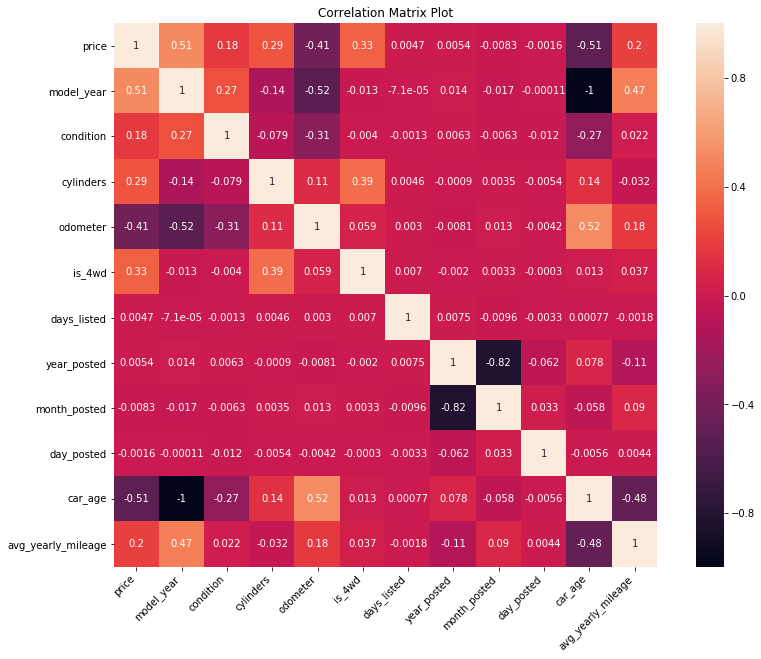

In [409]:
# Getting correlation matrix 
plt.figure(figsize=(14, 10))

corr = popular_cars.corr()
#corr_heat= sn.heatmap(corr, annot=True, square=True, cmap=sn.diverging_palette(20, 220, n=200))
#NEW LINE (ADDED BY REVIEWER)
corr_heat= sn.heatmap(corr, annot=True, square=True)
corr_heat.set_xticklabels(corr_heat.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title('Correlation Matrix Plot')


From the correlation plot above, we can see that there is a weak positive correlation between `model_year` and `price` with a correlation value of 0.53. `car_age` also has a weak negative correlation with `price` at -0.51. 

We can see that `car_age` and `model_year` has a strong negative correlation of -1. 

We will group our data by car type and study whether price depends on age, mileage, condition, transmission type, and color.

In [410]:
# Grouping cars by type and price 
popular_cars.groupby('type')['price'].agg(['mean', 'count']).sort_values(by='count', ascending=False)

,mean,count
type,,
sedan,6982.739085,11383
SUV,10474.188629,11292
truck,15138.856683,10571
pickup,15093.321643,5988
coupe,13532.506764,1922
wagon,9046.163701,1405
mini-van,8050.852093,1075
hatchback,6864.618297,951
van,8660.542910,536


We can see that the top 5 popular cars are: sedans, SUVs, trucks, pickups, and coupes. Sedans are the cheapest with a average price of 6,982 dollars, and trucks are the most expensive with an average price of 15,138 dollars. To analyze what factors impact the price most, we will make a new variable for the top 2 cars and use that in our analysis. 

In [411]:
# Creating new variable for top 2 most popular cars
top_cars = popular_cars[popular_cars.type.isin(['sedan', 'SUV'])]

# Printing first five rows of the table
top_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,car_age,avg_yearly_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,23,8,18125.000000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,7,7,15714.285714
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,2,3,26967.666667
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2018,6,20,5,11590.800000
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,2018,12,27,4,19803.000000


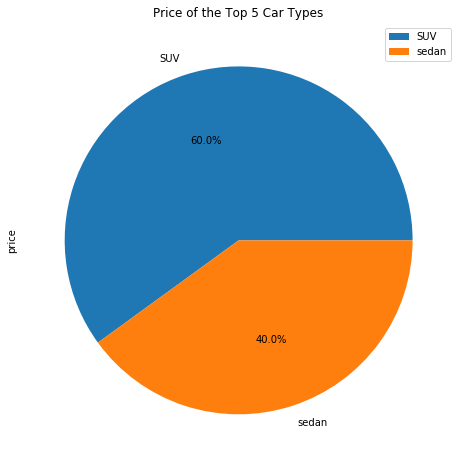

In [412]:
# Creating a pie chart for the price of the top two most popular vehicle types
top_cars.pivot_table(index='type', values='price', aggfunc=['count', 'mean']).plot(kind='pie', y='mean', title='Price of the Top 5 Car Types', 
                                                                                    autopct=('%1.1f%%'), figsize=(8,8))


We can see that sedans are the most popular car type, but also less expensive than SUVs. 

Correlation coefficient of price and mileage: 0.1931259759470341


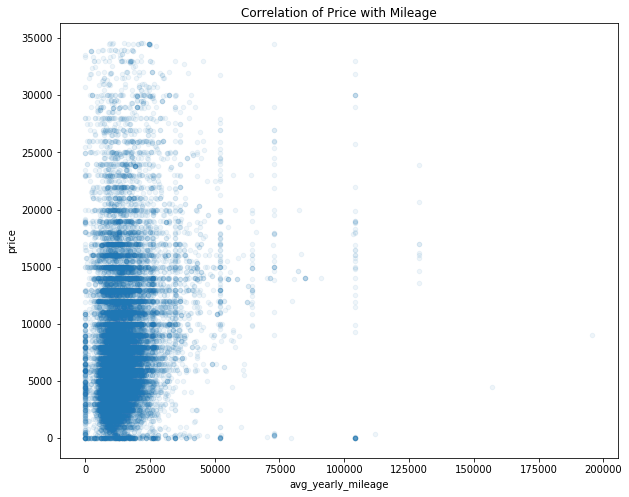

In [413]:
# Correlation of price with average yealy mileage for sedans and SUVs
top_cars.plot(kind='scatter', title='Correlation of Price with Mileage', x='avg_yearly_mileage', y='price', alpha=0.07, figsize=(10,8))

# Correlation coefficient of price and mileage
corr = top_cars['price'].corr(top_cars['avg_yearly_mileage'])
print(f'Correlation coefficient of price and mileage: {corr}')

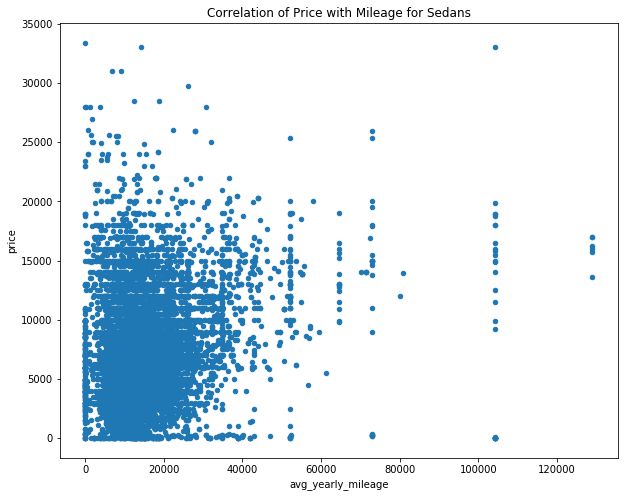

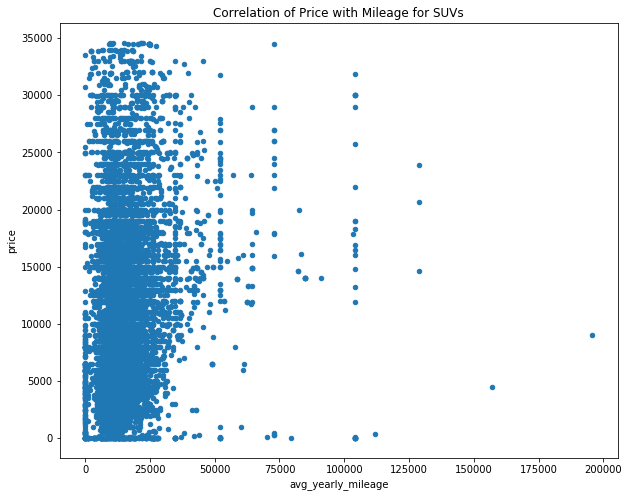

In [414]:
# Correlation of price with average yearly mileage for sedans
top_cars.query('type == "sedan"').plot(kind='scatter', title='Correlation of Price with Mileage for Sedans', x='avg_yearly_mileage', y='price', figsize=(10,8))

# Correlation of price with average yearly mileage for SUVs
top_cars.query('type == "SUV"').plot(kind='scatter', title='Correlation of Price with Mileage for SUVs', x='avg_yearly_mileage', y='price', figsize=(10,8))

We can see a slight negative correlation between price and mileage. As mileage increases, the price decreases. 

Correlation coefficient of price and car_age: -0.5194511187141625


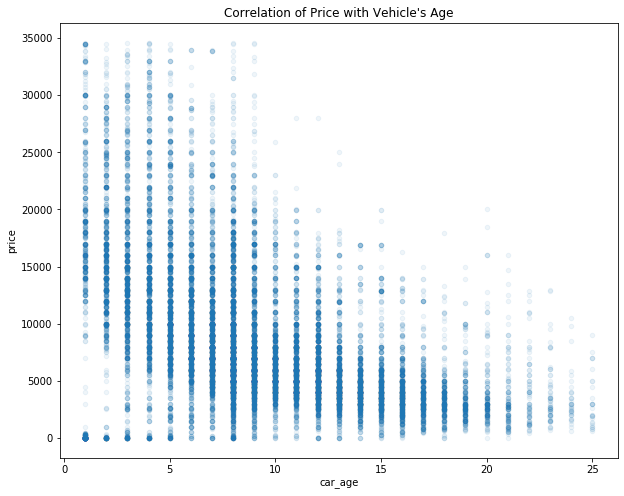

In [415]:
# Correlation of price and the vehicle's age
top_cars.plot(kind='scatter', title="Correlation of Price with Vehicle's Age", x='car_age', y='price', alpha=0.07, figsize=(10,8))

# Correlation coefficient of price and vehicle's age
corr = top_cars['price'].corr(top_cars['car_age'])
print(f'Correlation coefficient of price and car_age: {corr}')

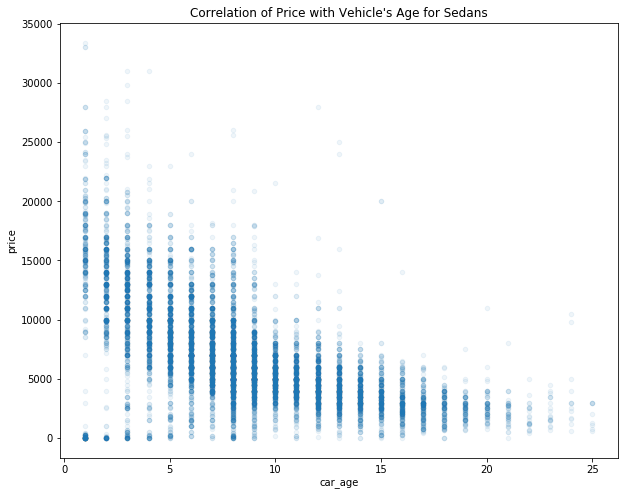

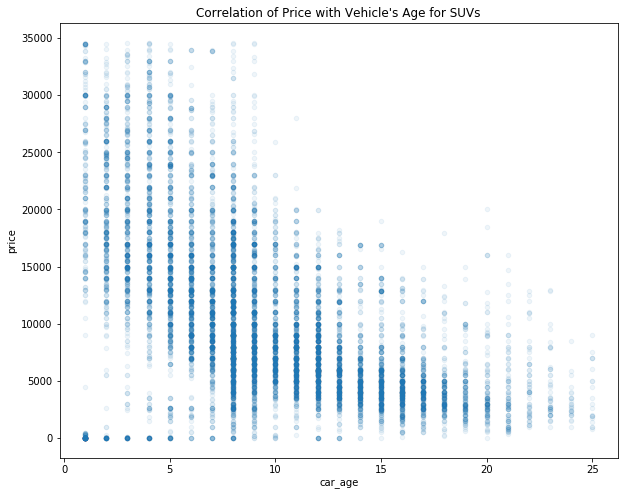

In [416]:
# Correlation of price with car_age for sedans
top_cars.query('type == "sedan"').plot(kind='scatter', title="Correlation of Price with Vehicle's Age for Sedans", x='car_age', y='price', 
                                       alpha=0.07, figsize=(10,8))

# Correlation of price with car_age for SUVs
top_cars.query('type == "SUV"').plot(kind='scatter', title="Correlation of Price with Vehicle's Age for SUVs", x='car_age', y='price', 
                                       alpha=0.07, figsize=(10,8))

We can see a negative correlation between the vehicle's age and price. The older the car is, the more it depreciates in value. 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'price')

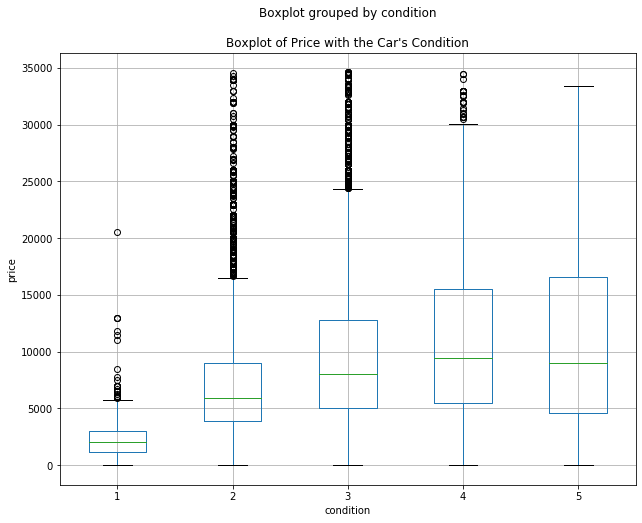

In [417]:
top_cars.boxplot(by='condition', column='price', figsize=(10,8))
plt.title("Boxplot of Price with the Car's Condition")
plt.xlabel('condition')
plt.ylabel('price')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


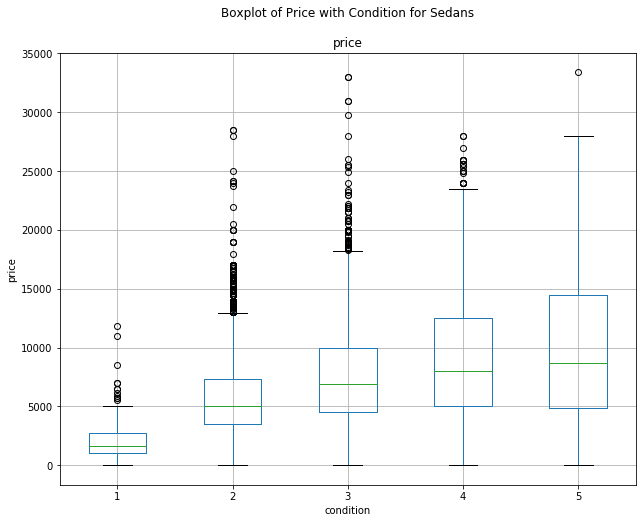

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


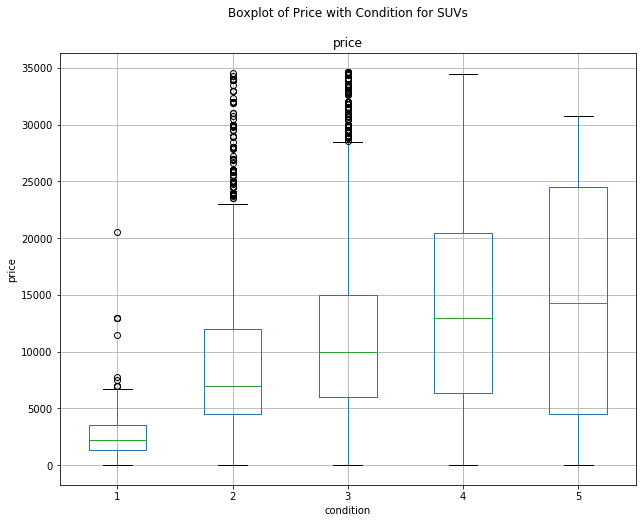

In [418]:
# Correlation of price and the vehicle's condition for sedans
top_cars.query('type == "sedan"').boxplot(by='condition', column='price', figsize=(10,8))
plt.suptitle("Boxplot of Price with Condition for Sedans")
plt.xlabel('condition')
plt.ylabel('price')
plt.show()

# Correlation of price and the vehicle's condition for SUVs
top_cars.query('type == "SUV"').boxplot(by='condition', column='price', figsize=(10,8))
plt.suptitle("Boxplot of Price with Condition for SUVs")
plt.xlabel('condition')
plt.ylabel('price')
plt.show()

When taking a closer look at how the condition of a car impacts the price of a car for sedans and SUVs, we see a positive correlation between price and condition. The better condition the car is in, the more expensive the car becomes.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'price')

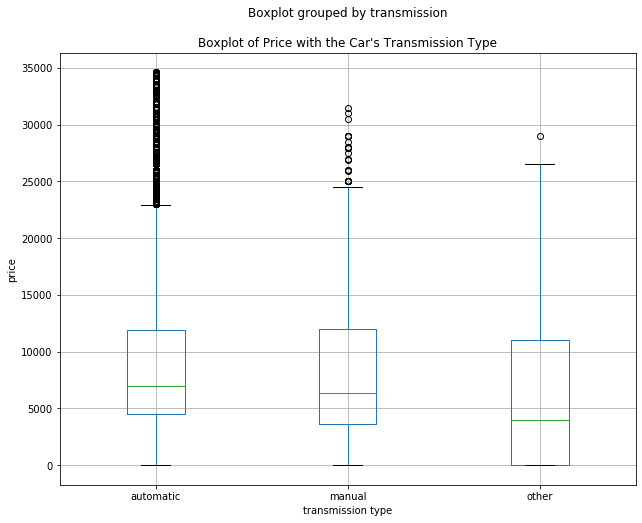

In [419]:
# Correlation of price and transmission type
top_cars.boxplot(by='transmission', column='price', figsize=(10,8))
plt.title("Boxplot of Price with the Car's Transmission Type")
plt.xlabel('transmission type')
plt.ylabel('price')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'price')

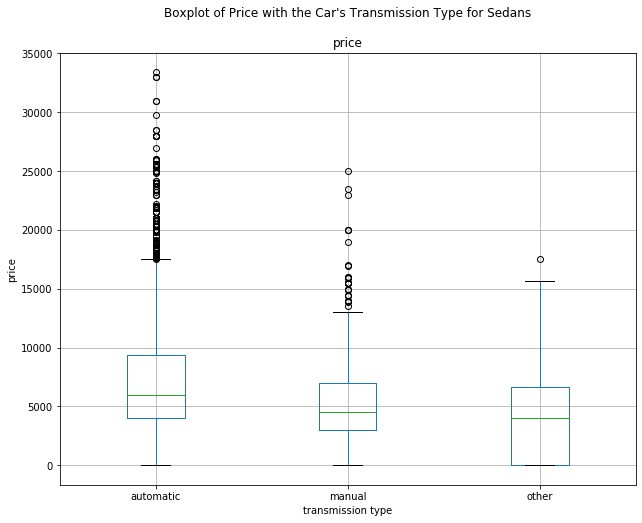

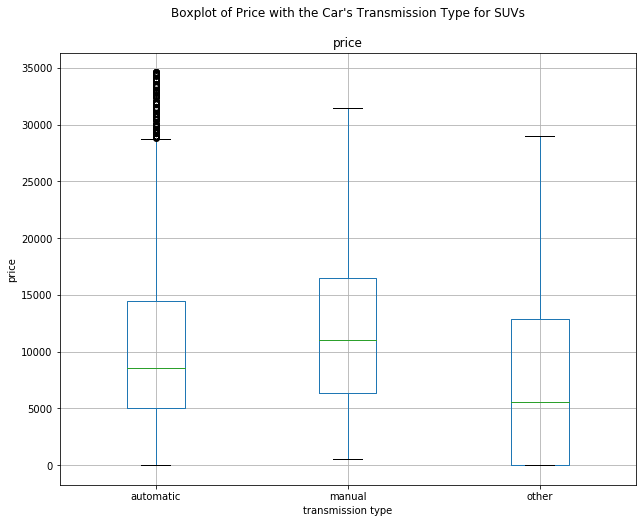

In [420]:
# Correlation of price and transmission type for sedans
top_cars.query('type == "sedan"').boxplot(by='transmission', column='price', figsize=(10,8))
plt.suptitle("Boxplot of Price with the Car's Transmission Type for Sedans")
plt.xlabel('transmission type')
plt.ylabel('price')

# Correlation of price and transmission type for SUVs
top_cars.query('type == "SUV"').boxplot(by='transmission', column='price', figsize=(10,8))
plt.suptitle("Boxplot of Price with the Car's Transmission Type for SUVs")
plt.xlabel('transmission type')
plt.ylabel('price')

Sedans with automatic transmission are more expensive than those with manual transmision. SUVs with manual type transmissions are more expensive than those with automatic transmissions. 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'price')

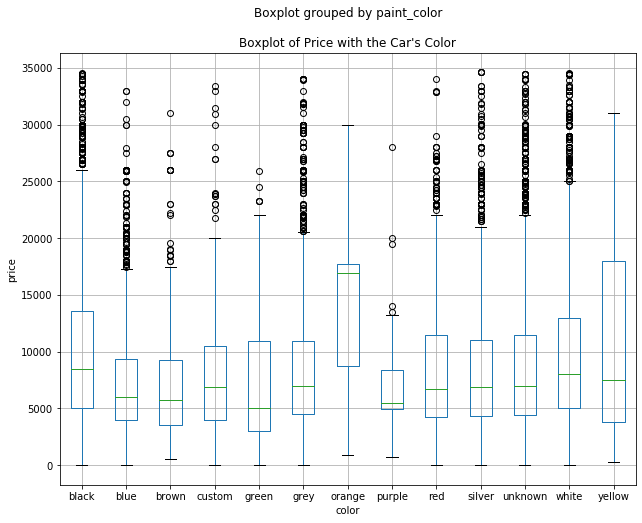

In [421]:
# Correlation of price and the car's color
top_cars.boxplot(by='paint_color', column='price', figsize=(10,8))
plt.title("Boxplot of Price with the Car's Color")
plt.xlabel('color')
plt.ylabel('price')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'price')

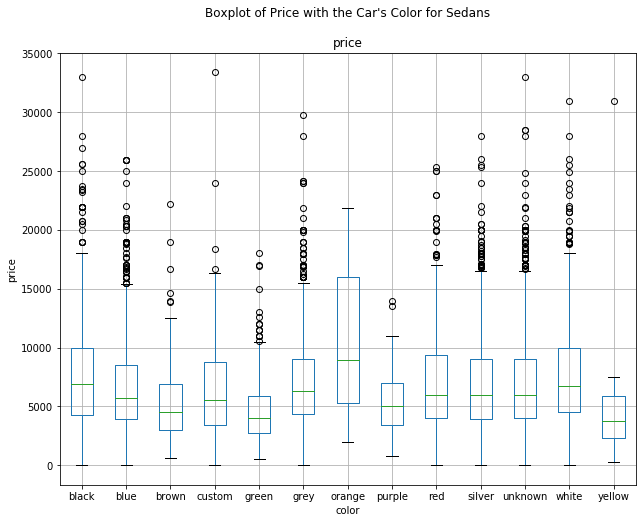

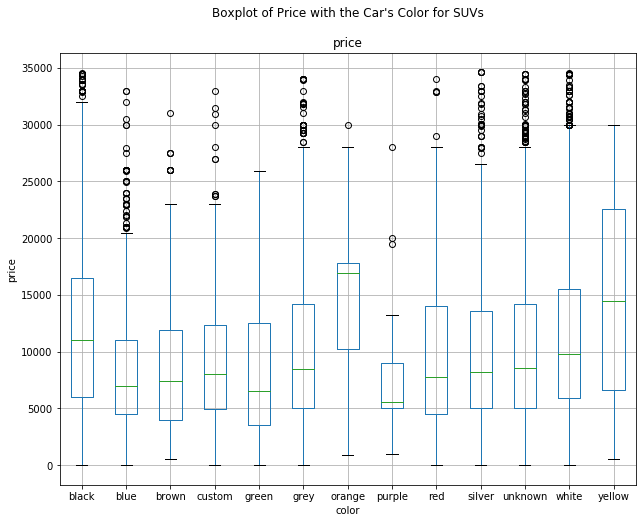

In [422]:
# Correlation of price and the car's color for sedans
top_cars.query('type == "sedan"').boxplot(by='paint_color', column='price', figsize=(10,8))
plt.suptitle("Boxplot of Price with the Car's Color for Sedans")
plt.xlabel('color')
plt.ylabel('price')

# Correlation of price and the car's color for SUVs
top_cars.query('type == "SUV"').boxplot(by='paint_color', column='price', figsize=(10,8))
plt.suptitle("Boxplot of Price with the Car's Color for SUVs")
plt.xlabel('color')
plt.ylabel('price')

The most expensive car color for both sedans and SUVs was orange.

# Findings

We have tested five hypotheses:
1. Mileage affects the price of a car. The more mileage a car has, the less it will be worth.  
2. Older cars will not be worth as much as newer cars
3.   Cars that are in better condition will be priced higher than cars in worse condition.
4. Transmission type will not have an effect on a car's price.
5. The car's paint color will not affect a car's price.

To analyze the data, we took the top five most popular car types: sedans, SUVs, trucks, pickups, and coupes. After analyzing the data:
1. Mileage affects the price of a car.
  * There was a negative correlation between the total mileage of a car and the price of the car. Generally, cars with higher mileage were listed at a lower price.

2. The car's age affects the price of a car.
  * There was a negative correlation between how old the car is and the price of the car. The older the car got, the less the car was worth. 


3. A car's condition affects the price of a car.
  * Generally speaking, there was a positive correlation between the car's condition and a car's price. "Like new" cars were the most expensive. 
  * Keep in mind that cars that were practically "brand new" were less expensive than cars that were "like new." This could be issues with the car that are more internal such as transmission issues. 

4. Transmission type affects the price of a car. 
  * Sedans with automatic transmission were more expensive than cars with manual transmision. 
  * SUVs with manual transmissions were more expensive than SUVs with automatic transmission. This makes sense since SUVs with manual transmission tend to be a special type of SUV that can be used for off-roading. 

The fourth hypothesis is rejected. 

5. A car's paint color did affect its price.
  *  Orange was the most expensive color for both sedans and SUVs. 
  
The fifth hypoethesis is rejected. 
